In [ ]:
import os
import sys
from google.colab import drive

# 1. Připojení Google Drive
drive.mount('/content/drive/')

# Změna aktuálního pracovního adresáře na BASE_PROJECT_PATH
BASE_PROJECT_PATH = "/content/drive/MyDrive/BUP_Video_Classification"
os.chdir(BASE_PROJECT_PATH)


# 2. Nastavení hlavních cest
SRC_PATH = os.path.join(BASE_PROJECT_PATH, "src")
DATA_PATH = os.path.join(BASE_PROJECT_PATH, "data")

# 3. Přidání složky 'src' do sys.path
if SRC_PATH not in sys.path:
    sys.path.append(SRC_PATH)
    print(f"Složka {SRC_PATH} přidána do sys.path")

# 4. Instalace závislostí
REQUIREMENTS_PATH = os.path.join(BASE_PROJECT_PATH, "requirements.txt")
if os.path.exists(REQUIREMENTS_PATH):
    print("Instaluji závislosti...")
    !pip install -r "$REQUIREMENTS_PATH"
else:
    print("VAROVÁNÍ: Soubor requirements.txt nenalezen.")

print("\n--- Prostředí je připraveno ---")
print(f"Složka s moduly: {SRC_PATH}")
print(f"Složka s daty: {DATA_PATH}")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Instaluji závislosti...

--- Prostředí je připraveno ---
Složka s moduly: /content/drive/MyDrive/BUP_Video_Classification/src
Složka s daty: /content/drive/MyDrive/BUP_Video_Classification/data


In [ ]:
import src.data_preparation as dp
import importlib

importlib.reload(dp)

# --- FÁZE 1: PŘÍPRAVA DAT ---

# 1. Seznam tříd, které chceme použít
selected_classes_list = [
    'ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'Basketball',
    'BenchPress', 'Biking', 'Billiards', 'BlowDryHair', 'BrushingTeeth',
    'CleanAndJerk', 'CliffDiving', 'CuttingInKitchen', 'Fencing', 'GolfSwing'
]

# 2. Volání funkce pro vytvoření mini-datasetu
dp.create_mini_dataset(
    base_data_path=DATA_PATH,
    selected_classes=selected_classes_list,
    full_dataset_folder="UCF101_full/UCF-101"
)

# 3. Volání funkce pro vytvoření splitů
dp.create_group_splits(base_data_path=DATA_PATH)

print("\nFáze 1 (Příprava dat) je kompletní.")


--- Spouštím create_mini_dataset ---
Zdroj: /content/drive/MyDrive/BUP_Video_Classification/data/UCF101_full/UCF-101
Cíl: /content/drive/MyDrive/BUP_Video_Classification/data/UCF101_mini
Složka /content/drive/MyDrive/BUP_Video_Classification/data/UCF101_mini již existuje.


Kopírování tříd: 100%|██████████| 15/15 [00:11<00:00,  1.29it/s]


Všechny soubory již byly zkopírovány.
--- Kopírování pro mini-dataset dokončeno ---

--- Spouštím create_group_splits ---
Načítám soubory z: /content/drive/MyDrive/BUP_Video_Classification/data/UCF101_mini
Nalezeno celkem 1986 videí.
Počet trénovacích videí: 1585
Počet testovacích videí: 401
Trénovací data uložena do: /content/drive/MyDrive/BUP_Video_Classification/data/train_split.csv
Testovací data uložena do: /content/drive/MyDrive/BUP_Video_Classification/data/test_split.csv
--- Vytvoření splitů dokončeno ---

Fáze 1 (Příprava dat) je kompletní.


--- FÁZE 2 (Test): Načítání modulu VideoProcessor ---
Testuji extrakci snímků na videu:
Třída: BenchPress
Cesta: /content/drive/MyDrive/BUP_Video_Classification/data/UCF101_mini/BenchPress/v_BenchPress_g23_c01.avi

Úspěšně extrahováno 5 snímků.
Ověření base64: Začíná na '/9j/4AAQ...' (délka: 17252)


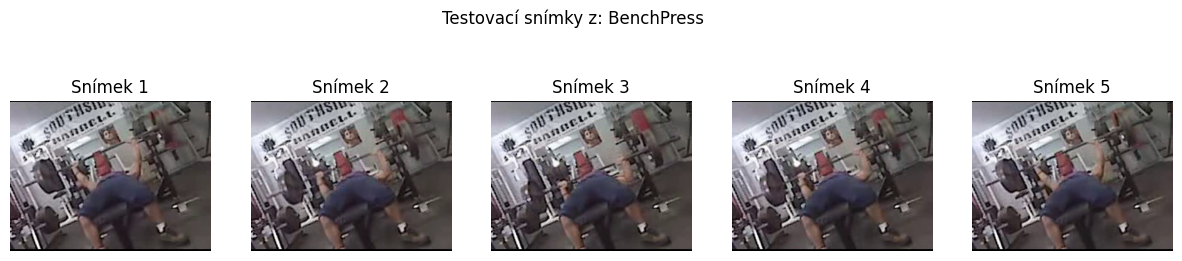

In [ ]:
import src.video_processing as vp
import src.data_preparation as dp
import importlib
import pandas as pd
import os
import matplotlib.pyplot as plt

importlib.reload(vp)
importlib.reload(dp)

print("--- FÁZE 2 (Test): Načítání modulu VideoProcessor ---")


train_csv_path = os.path.join(DATA_PATH, "train_split.csv")
if not os.path.exists(train_csv_path):
    print("CHYBA: 'train_split.csv' nenalezen. Spusťte prosím Fázi 1.")
else:
    train_df = pd.read_csv(train_csv_path)


    test_video_row = train_df.iloc[0]
    test_video_path = test_video_row['video_path']
    test_video_class = test_video_row['class_name']

    print(f"Testuji extrakci snímků na videu:")
    print(f"Třída: {test_video_class}")
    print(f"Cesta: {test_video_path}")

    extracted_frames = vp.extract_frames(test_video_path, num_frames=5)

    if extracted_frames:
        print(f"\nÚspěšně extrahováno {len(extracted_frames)} snímků.")


        base64_string = vp.pil_to_base64(extracted_frames[0])
        print(f"Ověření base64: Začíná na '/9j/4AAQ...' (délka: {len(base64_string)})")


        fig, axes = plt.subplots(1, len(extracted_frames), figsize=(15, 3))
        fig.suptitle(f"Testovací snímky z: {test_video_class}", y=1.05)
        for i, frame in enumerate(extracted_frames):
            axes[i].imshow(frame)
            axes[i].set_title(f"Snímek {i+1}")
            axes[i].axis('off')
        plt.show()
    else:
        print("CHYBA: Nepodařilo se extrahovat snímky.")

In [11]:
import src.llm_generation as lg
import importlib

importlib.reload(lg)

print("--- FÁZE 2 (Start): Generování popisů pomocí LLM ---")

# Pro finální běh použijte 5 nebo 10
lg.generate_all_descriptions(
    data_path=DATA_PATH,
    num_frames_per_video=3,  # Začněte s 3 snímky na video
    rate_limit_pause=0.5     # 0.5 sekundy pauza mezi API voláními
)

print("\n--- Fáze 2 je kompletní ---")

--- FÁZE 2 (Start): Generování popisů pomocí LLM ---
Celkem videí ke zpracování: 1986


Generování popisů:   3%|▎         | 52/1986 [32:48<20:19:55, 37.85s/it]


KeyboardInterrupt: 